# Exercise 1 Bank Data

In [2]:
import pandas as pd

In [69]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Data preprocessing

In [70]:
# Rename target
df=df.rename(columns={"y":"target"})

In [71]:
# Replace target values to be numeric
df["target"]=df["target"].replace({"no":0, "yes":1})

In [73]:
# Replace months from 1 to 12 numeric
num=[i for i in range(1,13)]
mon=['jan','feb','mar','apr','may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']
df["month"]=df["month"].replace(mon, num)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [74]:
# Check missing values

df.isnull().sum() # No missing data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [75]:
# Check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 5.9+ MB


In [76]:
# Check if variable is object type
clist=[i for i in df.columns if df[i].dtypes=="object"]

clist

df_object=df[clist]

df_object.head()

,job,marital,education,default,housing,loan,contact,poutcome
0,management,married,tertiary,no,yes,no,unknown,unknown
1,technician,single,secondary,no,yes,no,unknown,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,unknown
4,unknown,single,unknown,no,no,no,unknown,unknown


In [77]:
# Check unique values
for i in df_object.columns:
    ketqua=df_object[i].unique()
    
    print(i,":", ketqua,"#\t", len(ketqua))

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] #	 12
marital : ['married' 'single' 'divorced'] #	 3
education : ['tertiary' 'secondary' 'unknown' 'primary'] #	 4
default : ['no' 'yes'] #	 2
housing : ['yes' 'no'] #	 2
loan : ['no' 'yes'] #	 2
contact : ['unknown' 'cellular' 'telephone'] #	 3
poutcome : ['unknown' 'failure' 'other' 'success'] #	 4


### Standardize categorical variables

In [99]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
# Features and target

X=df.iloc[:, 0:(len(df.columns)-1)]

y=df["target"]

In [108]:
# Convert categorical to onehotencoder

ohe=OneHotEncoder()
ohe.fit(X[clist])
# Transform
X_ohe=ohe.transform(X[clist])

In [109]:
X_ohe_new=X_ohe.toarray()

In [110]:
# Get feature names
ohe.get_feature_names(clist)

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype=object)

In [111]:
# Convert onehotencoder to dataframe
df_ohe=pd.DataFrame(X_ohe_new, columns=ohe.get_feature_names(clist))
df_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


##### Merge both X numerics and df_ohe

In [115]:
# Gộp các cột vào với nhau. Cụ thể gộp cột từ chuyển đổi onehotencoder và cột số trước đó.

col_numeric=[i for i in X.columns if X[i].dtypes!="object"] # Các cột numeric 

X_new=pd.concat([X[col_numeric], df_ohe], axis=1)

X_new.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,5,261,1,-1,0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,29,5,5,151,1,-1,0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,2,5,5,76,1,-1,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,1506,5,5,92,1,-1,0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,1,5,5,198,1,-1,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Split dataset for training and testing

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=32)

## Building Decision tree classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [120]:
# Check model accuracy

accuracy=model.score(X_test, y_test)

print("Overall accuracy is {:.3}".format(accuracy))

# Train accuracy

print("Train overall accuracy is {}".format(model.score(X_train, y_train)))

print("--------------------------------\nModel seems overfit")

Overall accuracy is 0.875
Train overall accuracy is 1.0
--------------------------------
Model seems overfit


In [121]:
# Make prediction on test dataset
y_pred=model.predict(X_test)

y_prob=model.predict_proba(X_test)

In [130]:
# Get accuracy report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9994
           1       0.46      0.49      0.47      1309

    accuracy                           0.87     11303
   macro avg       0.70      0.71      0.70     11303
weighted avg       0.88      0.87      0.88     11303



### Visualize the result

In [126]:
from sklearn.metrics import roc_curve, auc

In [148]:
# Obtain the probability for True Positive
true_prob=y_prob[:,1]

true_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [135]:
# Get True Positive rate, and False Positive Rate

fpr, tpr, threshold=roc_curve(y_test,true_prob)

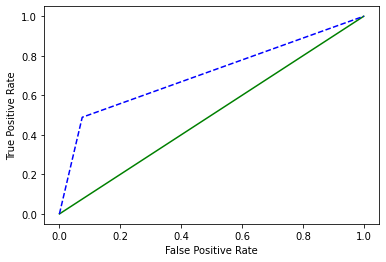

In [146]:
# Visualization
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1], color="g")
plt.plot(fpr, tpr, linestyle="--", color="b")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

- Noted that there is a difference between value=0 and value =1 in target variable while large difference in values. We may conduct data standardization.

### Balance target variable

In [149]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample=SMOTE().fit_resample(X_new, y)

#### Standard Scalar

In [151]:
from sklearn.preprocessing import StandardScaler

In [159]:
scaler=StandardScaler()
X_scaler=scalar.fit_transform(X_new) # Now we can use X_scaler for training and testing

# Exercise 2

In [187]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### Preprocessing 

In [188]:
# Features and target
X=df.iloc[:, 1:]

y=df["class"].replace({"e":0, "p":1})

In [189]:
for i in X.columns:
    ketqua=X[i].unique()
    print(f"{i}:\t  \t{ketqua}:\t#\t{len(ketqua)}")

cap-shape:	  	['x' 'b' 's' 'f' 'k' 'c']:	#	6
cap-surface:	  	['s' 'y' 'f' 'g']:	#	4
cap-color:	  	['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']:	#	10
bruises:	  	['t' 'f']:	#	2
odor:	  	['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']:	#	9
gill-attachment:	  	['f' 'a']:	#	2
gill-spacing:	  	['c' 'w']:	#	2
gill-size:	  	['n' 'b']:	#	2
gill-color:	  	['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']:	#	12
stalk-shape:	  	['e' 't']:	#	2
stalk-root:	  	['e' 'c' 'b' 'r' '?']:	#	5
stalk-surface-above-ring:	  	['s' 'f' 'k' 'y']:	#	4
stalk-surface-below-ring:	  	['s' 'f' 'y' 'k']:	#	4
stalk-color-above-ring:	  	['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']:	#	9
stalk-color-below-ring:	  	['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']:	#	9
veil-type:	  	['p']:	#	1
veil-color:	  	['w' 'n' 'o' 'y']:	#	4
ring-number:	  	['o' 't' 'n']:	#	3
ring-type:	  	['p' 'e' 'l' 'f' 'n']:	#	5
spore-print-color:	  	['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']:	#	9
population:	  	['s' 'n' 'a' 'v' 'y' 'c']:	#	6
habitat:	  	['u' 'g' 'm' 'd' 'p' 'w' 'l']

In [190]:
# Get dummies 
X=pd.get_dummies(X)

X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## Building the decision tree model

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [202]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [204]:
# Make prediction on X_test
y_pred=model.predict(X_test)

In [203]:
# Check model accuracy

test_score=model.score(X_test, y_test)
train_score=model.score(X_train,y_train)

print(f"Test accuracy: {test_score}\nTrain accuracy: {train_score}")

Test accuracy: 1.0
Train accuracy: 1.0


In [205]:
# Check classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Visualizing the result 

In [206]:
from sklearn.metrics import roc_curve, auc

In [207]:
y_prob=model.predict_proba(X_test)

score_true=y_prob[:,1]# Get probability for 1 or true positive

fpr, tpr, threshold=roc_curve(y_test, score_true)

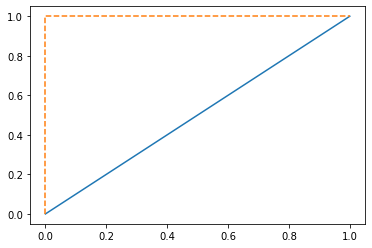

In [210]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1])

plt.plot(fpr, tpr, linestyle="--")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive ")